### Import

In [29]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
plt.style.use("classic")
%matplotlib inline
import seaborn as sns

### Retrieve data

In [2]:
# file

def read_file(user):
    if user=='nicola':
        dirname = '/Users/nicola/Desktop/Advanced Laboratory A/data/20220517/252Cf_CLYC_both_COINCIDENCE_CH4_1/FILTERED/'
    if user=='vittoria':
        dirname = '/mnt/c/Users/UTENTE/Downloads/252Cf_CLYC_both_COINCIDENCE_CH4_1/FILTERED/'
    if user == "javi":
        dirname = "/Users/javi/Documents/Padova/2/AdvancedLab/AdvancedLab_22-23/data/20220517/252Cf_CLYC_both_COINCIDENCE/FILTERED/"
    filename_ch0 = dirname + 'CH_0@DT5725_1701_Data_252Cf_CLYC_both_COINCIDENCE_CH4_1.csv'
    filename_ch2 = dirname + 'CH_2@DT5725_1701_Data_252Cf_CLYC_both_COINCIDENCE_CH4_1.csv'
    filename_ch4 = dirname + 'CH_4@DT5725_1701_Data_252Cf_CLYC_both_COINCIDENCE_CH4_1.csv'
    return filename_ch0, filename_ch2, filename_ch4

filename_ch0, filename_ch2, filename_ch4 = read_file('javi')

# retain data
df0 = pd.read_csv(filename_ch0, skiprows=1, header=None, sep=';')
df0.columns = (['TIMETAG', 'ENERGY', 'FLAGS'] + [x for x in range(len(df0.columns)-3)])
df2 = pd.read_csv(filename_ch2, skiprows=1, header=None, sep=';')
df2.columns = (['TIMETAG', 'ENERGY', 'FLAGS'] + [x for x in range(len(df2.columns)-3)])
df4 = pd.read_csv(filename_ch4, skiprows=1, header=None, sep=';')
df4.columns = (['TIMETAG', 'ENERGY', 'FLAGS'] + [x for x in range(len(df4.columns)-3)])

# print example
df2

,TIMETAG,ENERGY,FLAGS,0,1,2,3,4,5,6,...,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495
0,58257396000,94,0x0,3392,3392,3398,3398,3408,3408,3401,...,3397,3397,3393,3393,3397,3397,3398,3398,3404,3404
1,100654176000,205,0x0,3398,3398,3397,3397,3390,3390,3390,...,3405,3405,3411,3411,3408,3408,3407,3407,3426,3426
2,114566304000,355,0x0,3379,3379,3401,3401,3398,3398,3396,...,3433,3433,3454,3454,3422,3422,3444,3444,3434,3434
3,135453084000,236,0x0,3398,3398,3401,3401,3393,3393,3396,...,3384,3384,3410,3410,3404,3404,3412,3412,3423,3423
4,207175276000,197,0x0,3380,3380,3399,3399,3413,3413,3401,...,3413,3413,3409,3409,3423,3423,3404,3404,3410,3410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50213,659354877776000,88,0x0,3391,3391,3396,3396,3397,3397,3395,...,3407,3407,3401,3401,3404,3404,3395,3395,3392,3392
50214,659366279256000,66,0x0,3398,3398,3402,3402,3403,3403,3396,...,3406,3406,3396,3396,3409,3409,3396,3396,3401,3401
50215,659373580712000,289,0x0,3396,3396,3383,3383,3395,3395,3397,...,3420,3420,3404,3404,3391,3391,3408,3408,3422,3422
50216,659400908936000,348,0x0,3391,3391,3404,3404,3390,3390,3394,...,3482,3482,3452,3452,3447,3447,3426,3426,3417,3417


In [3]:
df0

,TIMETAG,ENERGY,FLAGS,0,1,2,3,4,5,6,...,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495
0,58257416000,302,0x0,3283,3283,3295,3295,3298,3298,3290,...,3282,3282,3290,3290,3295,3295,3283,3283,3290,3290
1,59172388000,229,0x0,3271,3271,3265,3265,3269,3269,3267,...,3280,3280,3289,3289,3290,3290,3283,3283,3283,3283
2,75184860000,185,0x0,3273,3273,3274,3274,3277,3277,3274,...,3291,3291,3292,3292,3301,3301,3304,3304,3297,3297
3,76854012000,237,0x0,3274,3274,3278,3278,3277,3277,3275,...,3286,3286,3282,3282,3280,3280,3285,3285,3289,3289
4,100654188000,651,0x0,3268,3268,3265,3265,3268,3268,3264,...,3322,3322,3322,3322,3330,3330,3335,3335,3337,3337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51663,659354877796000,290,0x0,3278,3278,3275,3275,3268,3268,3270,...,3281,3281,3283,3283,3295,3295,3285,3285,3289,3289
51664,659364709900000,214,0x0,3272,3272,3270,3270,3269,3269,3266,...,3299,3299,3302,3302,3299,3299,3294,3294,3289,3289
51665,659400167468000,202,0x0,3272,3272,3267,3267,3274,3274,3270,...,3281,3281,3279,3279,3280,3280,3285,3285,3289,3289
51666,659400908952000,1109,0x0,3266,3266,3263,3263,3267,3267,3261,...,3391,3391,3374,3374,3358,3358,3368,3368,3369,3369


### Coincidences for CLYC_MI (ch0 and ch2)
TO DO: Mettere tutto in una funzione `getCoinc(df1, df2)` che crea le coincidenze e restituisce i due dataframe con solo coincidenze. Poi in una cella sotto si chiama la funzione applicandola ai due dataframe tipo: `df0_new, df2_new = getCoinc(df0, df2)`
Poi alla fine, dopo aver calcolato la PSA, bisognerà rifare la stessa cosa con gli ultimi dataframe tipo: `df_PD_new, df_MI_new = getCoinc(df_PD, df_MI)`

In [4]:
'''
   The getCoinc function finds the coincidences between 2 DataFrames 
   basing on the timetags. The function returns the two modified 
   DataFrames (removed the unmatched events and sorted in correct order
   the others). Inputs: DataFrame1, DataFrame2, tolerance in the 
   timetags matching. (mind the two DataFrames order!)
'''

def getCoinc(df1, df2, tol=10**5): #tolerance (ps)
    
    # sort dataframes
    df1 = df1.sort_values('TIMETAG')
    df2 = df2.sort_values('TIMETAG')

    # retrieve timestamps (numpy arrays)
    timetag1 = np.array(df1.loc[:, 'TIMETAG'])
    timetag2 = np.array(df2.loc[:, 'TIMETAG'])

    # modifying the temporary timetag2 array in the for loop 
    timetag2_temp = timetag2.copy() 

    couples, eliminate_row, diff = [], [], []
    counter = 0

    for n, i in enumerate(timetag1):
        coinc = np.argwhere(abs(timetag2_temp-i) <= tol) # find the index of timetag2 where the diff is smaller than tol
    
        if np.size(coinc) == 0: 
            
            eliminate_row.append(n)
            counter+=1 # times when this happens, necessary to correct the position to append in other cases
    
        elif np.size(coinc) == 1: # just one couple found
            
            couples.append([n, coinc[0][0] + (n-counter) ]) # append the timetag1 and timetag2 positions for the coincidence found
            timetag2_temp = np.delete(timetag2_temp, coinc[0][0]) # remove the values that have been associated
    
        else:
            for [position] in coinc: 
                diff.append(abs(timetag2_temp[position]-i)) # difference between the candidate timetag2 values and i
            min_index = diff.index(min(diff)) # find the minimum difference index in the diff list
            couples.append([n, coinc[min_index][0] + (n-counter)]) # append the best couple
            diff = [] 
            timetag2_temp = np.delete(timetag2_temp, coinc[min_index][0])
    
    # rearrange the second DataFrame row order to match the first one and remove the non associated rows of both DataFrames
    index_timetag2 = []
    for [i,j] in couples:
        index_timetag2.append(j)
        
    index_timetag1 = [x for x in range(len(df1.index)) if x not in eliminate_row]
    
    # create final DataFrames
    df1 = df1.loc[index_timetag1]
    df2 = df2.loc[index_timetag2]
    
    df1 = df1.set_index([pd.Index([i for i in range(len(df1.index)) ])])
    
    return df1, df2
    

In [5]:
df0_new, df2_new = getCoinc(df0, df2);

In [6]:
df0_new

,TIMETAG,ENERGY,FLAGS,0,1,2,3,4,5,6,...,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495
0,58257416000,302,0x0,3283,3283,3295,3295,3298,3298,3290,...,3282,3282,3290,3290,3295,3295,3283,3283,3290,3290
1,100654188000,651,0x0,3268,3268,3265,3265,3268,3268,3264,...,3322,3322,3322,3322,3330,3330,3335,3335,3337,3337
2,114566320000,1132,0x0,3275,3275,3270,3270,3274,3274,3275,...,3374,3374,3380,3380,3377,3377,3373,3373,3366,3366
3,135453096000,752,0x0,3273,3273,3278,3278,3274,3274,3284,...,3328,3328,3318,3318,3333,3333,3341,3341,3346,3346
4,207175296000,634,0x0,3291,3291,3289,3289,3288,3288,3282,...,3325,3325,3315,3315,3322,3322,3325,3325,3319,3319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39056,659348225824000,257,0x0,3295,3295,3292,3292,3286,3286,3297,...,3300,3300,3293,3293,3281,3281,3295,3295,3303,3303
39057,659348280056000,531,0x0,3274,3274,3275,3275,3276,3276,3276,...,3308,3308,3315,3315,3313,3313,3320,3320,3324,3324
39058,659354877796000,290,0x0,3278,3278,3275,3275,3268,3268,3270,...,3281,3281,3283,3283,3295,3295,3285,3285,3289,3289
39059,659400908952000,1109,0x0,3266,3266,3263,3263,3267,3267,3261,...,3391,3391,3374,3374,3358,3358,3368,3368,3369,3369


### Calculation of the PSA for both CLYCs (ch2 and ch4)

In [7]:
# function to get PSA from a dataframe
def getPSA(df, Nevent = 10000, nbaseline = 20, thr = 50, shortgate = 60, longgate = 250):

    '''
    parameters: df with the waveforms, Nevent is the total number of events to analyze,
    nbaseline is the number of samples where the baseline is calculated, thr is the 
    threshold value for starting the integration, qlong and qshort are the gates for the
    integration. The last two should not be modified
    '''

    psa = []

    #loop over the events
    for i in range(Nevent):
        # retrieve data
        waveform = np.array(df.iloc[i, 3:])

        # calculate baseline of the waveforms
        baseline = np.mean(waveform[3:nbaseline])

        # subtract baseline to waveforms
        waveform = waveform - baseline

        # calculation of starting point for integration
        start = 0
        for j in range(500):
            if waveform[j]>=thr and waveform[j+1]>=thr and waveform[j+2]>=thr and waveform[j+3]>=thr:
                aux = j
                start = aux
                break
            
        # calculation of qlong and qshort (from bin 50 on) for channel 2
        qlong, qshort = 0., 0.
        for j in np.arange(start, start+longgate):
            if j < start+shortgate : qshort += waveform[j]
            qlong += waveform[j]

        # calculation of PSA for channel 2
        aux_psa = (qlong - qshort) / qlong
        psa.append(aux_psa)

    return psa

In [8]:
nevents = 10000

# retrieving the psa for the two detectors
psa_MI = getPSA(df2, nevents)
psa_PD = getPSA(df4, nevents)

In [9]:
# defining final dataframe for both CLYCs
df_PD = pd.DataFrame({ 'TIMETAG' : df4.iloc[:nevents, 0], 'Energy' : df4.iloc[:nevents, 1], 'PSA' : psa_PD })
df_MI = pd.DataFrame({ 'TIMETAG' : df0_new.iloc[:nevents, 0], 'Energy' : df0_new.iloc[:nevents, 1], 'PSA' : psa_MI })

df_PD

,TIMETAG,Energy,PSA
0,58257364000,64,0.539835
1,59172332000,71,0.602042
2,75184808000,68,0.575459
3,76853944000,198,0.557012
4,100654148000,76,0.534752
...,...,...,...
9995,141791165784000,100,0.581926
9996,141815554920000,61,0.546890
9997,141816489868000,69,0.587362
9998,141817470076000,100,0.574838


### Coincidences between the two CLYCs


In [10]:
df_PD_new, df_MI_new = getCoinc(df_PD, df_MI);

In [11]:
df_PD_new

,TIMETAG,Energy,PSA
0,58257364000,64,0.539835
1,100654148000,76,0.534752
2,114566272000,63,0.559781
3,135453048000,223,0.576339
4,207175236000,130,0.573940
...,...,...,...
6032,141777106636000,128,0.594731
6033,141791165784000,100,0.581926
6034,141815554920000,61,0.546890
6035,141816489868000,69,0.587362


In [12]:
df_final = pd.concat([df_PD_new, df_MI_new], axis=1, join='inner')
df_final = df_final.drop('TIMETAG', 1)
df_final.columns = ['ENERGY_PD', 'PSA_PD', 'ENERGY_MI', 'PSA_MI']

/var/folders/nv/28ksfhj10wz9h413w7pr82sc0000gn/T/ipykernel_23818/4016755066.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_final = df_final.drop('TIMETAG', 1)


### Recognition of Gammas and Neutrons

In [13]:
# define energy thresholds and PSA cuts

# energy threshold
threshold_PD = 200
threshold_MI = 800

# gamma cuts
PSArange_gamma_PD = [0.55, 0.60]
PSArange_gamma_MI = [0.53, 0.58]

# neutron cuts
PSArange_neutron_PD = [0.60, 1]
PSArange_neutron_MI = [0.58, 1]

In [14]:
subth_mask = df_final[(df_final["ENERGY_PD"] < threshold_PD) | (df_final["ENERGY_MI"] < threshold_MI)].index
df_final.drop(subth_mask, inplace = True)


gamma_mask = df_final["PSA_PD"] < PSArange_gamma_PD[1]; neutron_mask = df_final["PSA_PD"] > PSArange_neutron_PD[0]
df_final.loc[gamma_mask, "pID_PD"] = "gamma"
df_final.loc[neutron_mask, "pID_PD"] = "neutron"

gamma_mask = df_final["PSA_MI"] < PSArange_gamma_PD[1]; neutron_mask = df_final["PSA_MI"] > PSArange_neutron_PD[0]
df_final.loc[gamma_mask, "pID_MI"] = "gamma"; df_final.loc[neutron_mask, "pID_MI"] = "neutron"

In [15]:
df_final

,ENERGY_PD,PSA_PD,ENERGY_MI,PSA_MI,pID_PD,pID_MI
66,258,0.570355,906,0.587653,gamma,gamma
95,565,0.580191,2105,0.597217,gamma,gamma
192,239,0.560541,944,0.585314,gamma,gamma
281,339,0.581747,1253,0.594419,gamma,gamma
286,396,0.553490,1651,0.585342,gamma,gamma
...,...,...,...,...,...,...
5817,587,0.585207,838,0.607210,gamma,neutron
5836,380,0.575987,1220,0.577558,gamma,gamma
5838,245,0.591213,1167,0.594738,gamma,gamma
5867,294,0.577443,2435,0.583032,gamma,gamma


### Gamma-gamma, gamma-neutron and neutron-Neutron coincidences

In [16]:
count_coincidences = df_final.groupby(['pID_PD', 'pID_MI']).size()
count_coincidences

pID_PD   pID_MI 
gamma    gamma      83
         neutron    40
neutron  gamma       8
         neutron     5
dtype: int64

### Graphics

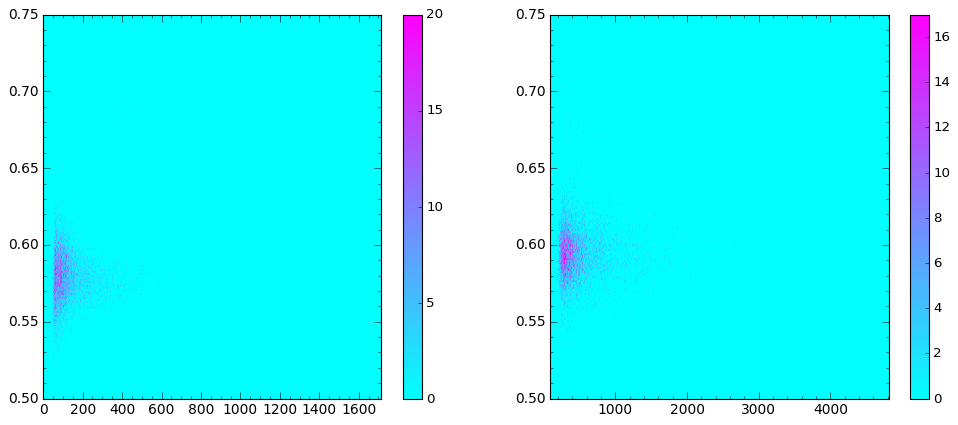

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6)); fig.patch.set_facecolor('xkcd:white')
for i in range(len(ax)):
    ax[i].tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
    ax[i].minorticks_on()
    ax[i].tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
    ax[i].tick_params(axis = 'both', labelsize = 12.5)
h2_PD = ax[0].hist2d(df_PD['Energy'], df_PD['PSA'], bins = (500,500), cmap = "cool") # afmhot, hot, gist_heat are others that work reasonably well
fig.colorbar(h2_PD[3], ax=ax[0])

h2_MI = ax[1].hist2d(df_MI['Energy'], df_MI['PSA'], bins = (500,500), cmap = "cool")
fig.colorbar(h2_MI[3], ax=ax[1])

for i in range(len(ax[:])):
    ax[i].set_ylim(0.5, 0.75)

In [26]:
# correlated gamma energies
gg_energy = np.array(df_final["ENERGY_PD"][df_final[ (df_final["pID_PD"] == "gamma") & (df_final["pID_MI"] == "gamma") ].index]), np.array(df_final["ENERGY_MI"][df_final[ (df_final["pID_PD"] == "gamma") & (df_final["pID_MI"] == "gamma") ].index])

neutrons_energy = np.hstack((np.array(df_final["ENERGY_PD"][df_final[ (df_final["pID_PD"] == "neutron") & (df_final["pID_MI"] == "gamma") ].index]), np.array(df_final["ENERGY_MI"][df_final[ (df_final["pID_MI"] == "neutron") & (df_final["pID_PD"] == "gamma") ].index])))
gammas_energy = np.hstack((np.array(df_final["ENERGY_PD"][df_final[ (df_final["pID_PD"] == "gamma") & (df_final["pID_MI"] == "neutron") ].index]), np.array(df_final["ENERGY_MI"][df_final[ (df_final["pID_MI"] == "gamma") & (df_final["pID_PD"] == "neutron") ].index])))
ng_energy = [neutrons_energy, gammas_energy]

nn_energy = np.array(df_final["ENERGY_PD"][df_final[ (df_final["pID_PD"] == "neutron") & (df_final["pID_MI"] == "neutron") ].index]), np.array(df_final["ENERGY_MI"][df_final[ (df_final["pID_PD"] == "neutron") & (df_final["pID_MI"] == "neutron") ].index])

Text(0.5, 0.98, 'neutron-neutron correlation')

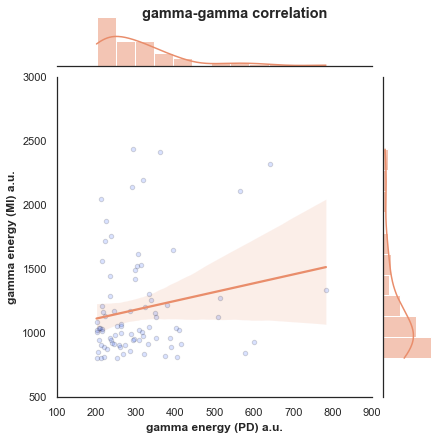

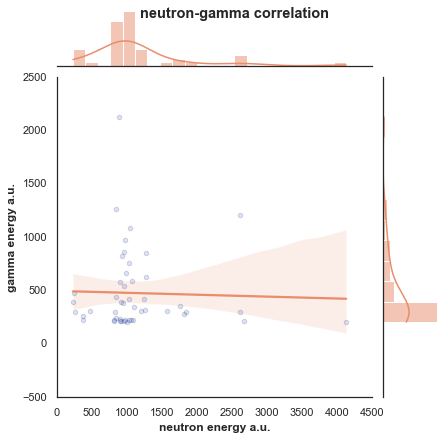

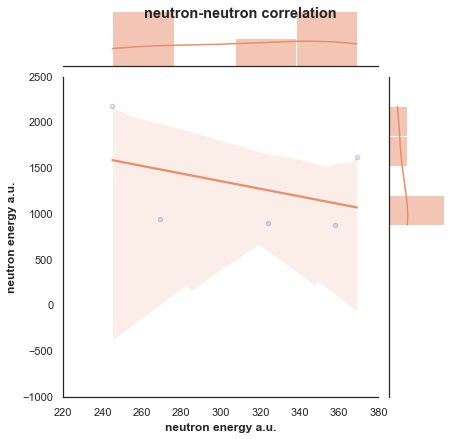

In [47]:
sns.set_theme(context = "notebook", style = "white", palette = "bright")
sns.set_palette("flare")

g = sns.jointplot(x = gg_energy[0], y = gg_energy[1], kind = "reg", scatter = False)
g.ax_joint.scatter(gg_energy[0], gg_energy[1], marker = "o", alpha = 0.15, edgecolors = "black")
g.ax_joint.set_xlabel("gamma energy (PD) a.u.", fontweight='bold')
g.ax_joint.set_ylabel("gamma energy (MI) a.u.", fontweight='bold')
g.fig.suptitle("gamma-gamma correlation", fontweight = "bold", fontsize = 14.5)

g = sns.jointplot(x = ng_energy[0], y = ng_energy[1], kind = "reg", scatter = False)
g.ax_joint.scatter(ng_energy[0], ng_energy[1], marker = "o", alpha = 0.15, edgecolors = "black")
g.ax_joint.set_xlabel("neutron energy a.u.", fontweight='bold')
g.ax_joint.set_ylabel("gamma energy a.u.", fontweight='bold')
g.fig.suptitle("neutron-gamma correlation", fontweight = "bold", fontsize = 14.5)


g = sns.jointplot(x = nn_energy[0], y = nn_energy[1], kind = "reg", scatter = False)
g.ax_joint.scatter(nn_energy[0], nn_energy[1], marker = "o", alpha = 0.15, edgecolors = "black")
g.ax_joint.set_xlabel("neutron energy a.u.", fontweight='bold')
g.ax_joint.set_ylabel("neutron energy a.u.", fontweight='bold')
g.fig.suptitle("neutron-neutron correlation", fontweight = "bold", fontsize = 14.5)